<div class='alert alert-danger'>
    <h1 align="center">Regularization and Overfitting</h1> 
</div>

## Introduction

**Overfitting:**
- A very common problem in machine learning
- When the model is **much more complex** than it shoud be (i.e. for using a lot of features)
 - it may perform very well on the training data, 
 - but it performs very badly for new (unseen) data.
- In such situations, the model **can not generalize** well.

<img src='imgs/regression_overfit_fig.png' width='80%'>

**Regularization:**
- An effective way to avoid (or at least to reduce) overfitting.

**Idea:** the idea in regularization is very simple:
- Trying too keep the value of the parameters as small as possible by introducing **penalty for large values**.

This is a **multi-objective optimization** problem:
- Trying to learn training data as accurate as possible.
- Trying to predict new data as accurate as possible.

This can be achieved by simply adding another term to our cost function:

### $$J(\theta) = Cost(X, y, \theta) + \lambda R(\theta)$$

- The second term in the above function is called **regularization term**.
- The $\lambda$ is **regularization strength**, a mean to balance or trade-off between our two different objectives.

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score



In [3]:
# initial setup
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 150

plt.style.use('ggplot')
np.random.seed(0)
np.set_printoptions(precision=2, linewidth=100)
warnings.filterwarnings(action='ignore')

## Regression with Regularization

### Generate data

In [4]:
def f(x):
    return np.cos(1.5 * np.pi * x)

def generate_data(n_samples=30):
    x = np.sort(np.random.rand(n_samples))
    y = f(x) + 0.2 * np.random.randn(n_samples) 
    return x, y

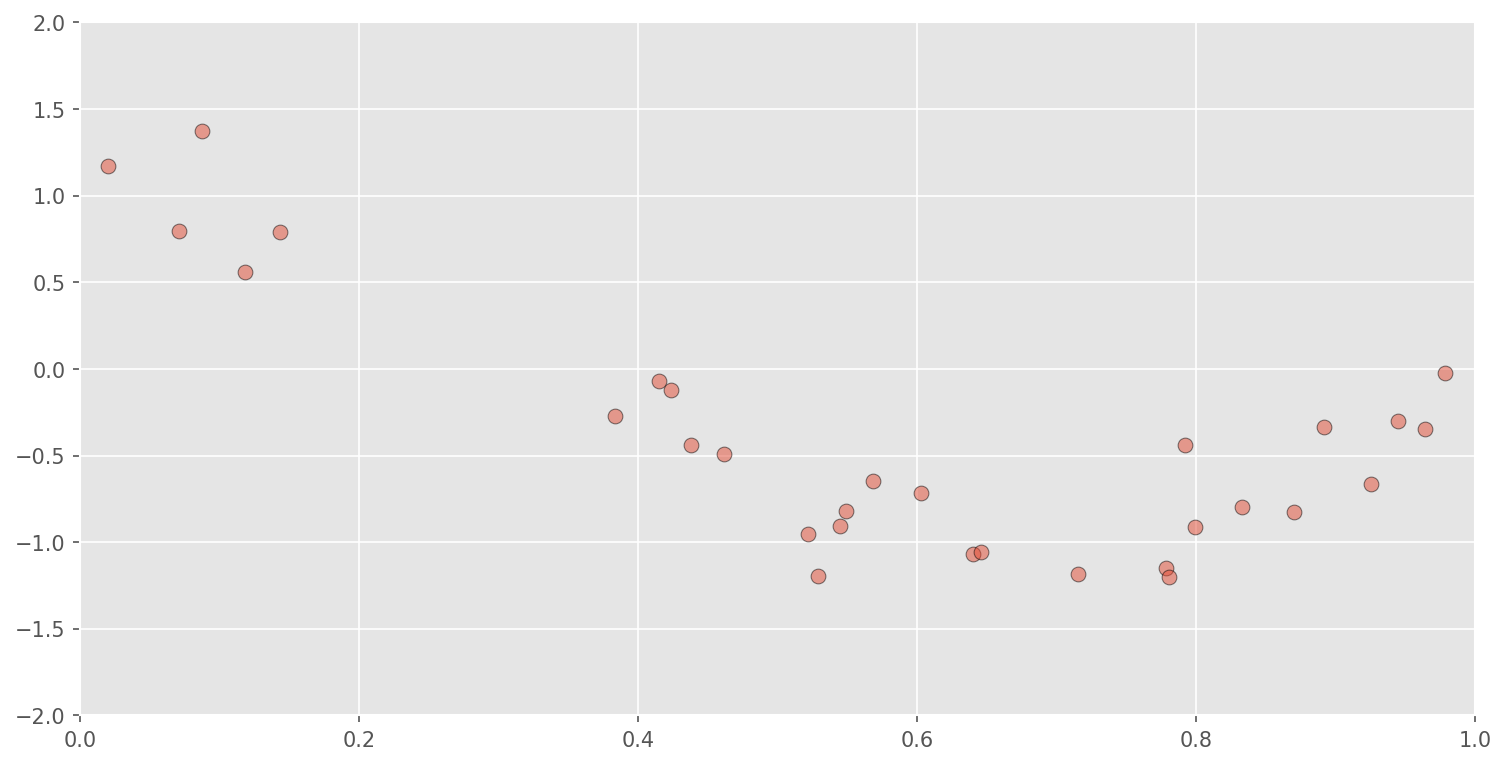

In [5]:
n_samples = 30 # number of data samples
x, y = generate_data(n_samples)

# plot data
plt.figure()
plt.scatter(x, y, s=50, edgecolors='k', alpha=0.5, cmap=plt.cm.coolwarm)
plt.xlim(0, 1)
plt.ylim(-2, 2)
plt.show()

### Polynomial Regression

In [6]:
def fit_poly(x, y, degree=1):
    
    # add polynomial features
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    
    # create and fit the model
    linear_regression = LinearRegression()
    model = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    model.fit(x[:, None], y)
    return model

In [7]:
degrees = [1, 3, 5, 7, 9, 11, 13, 15]

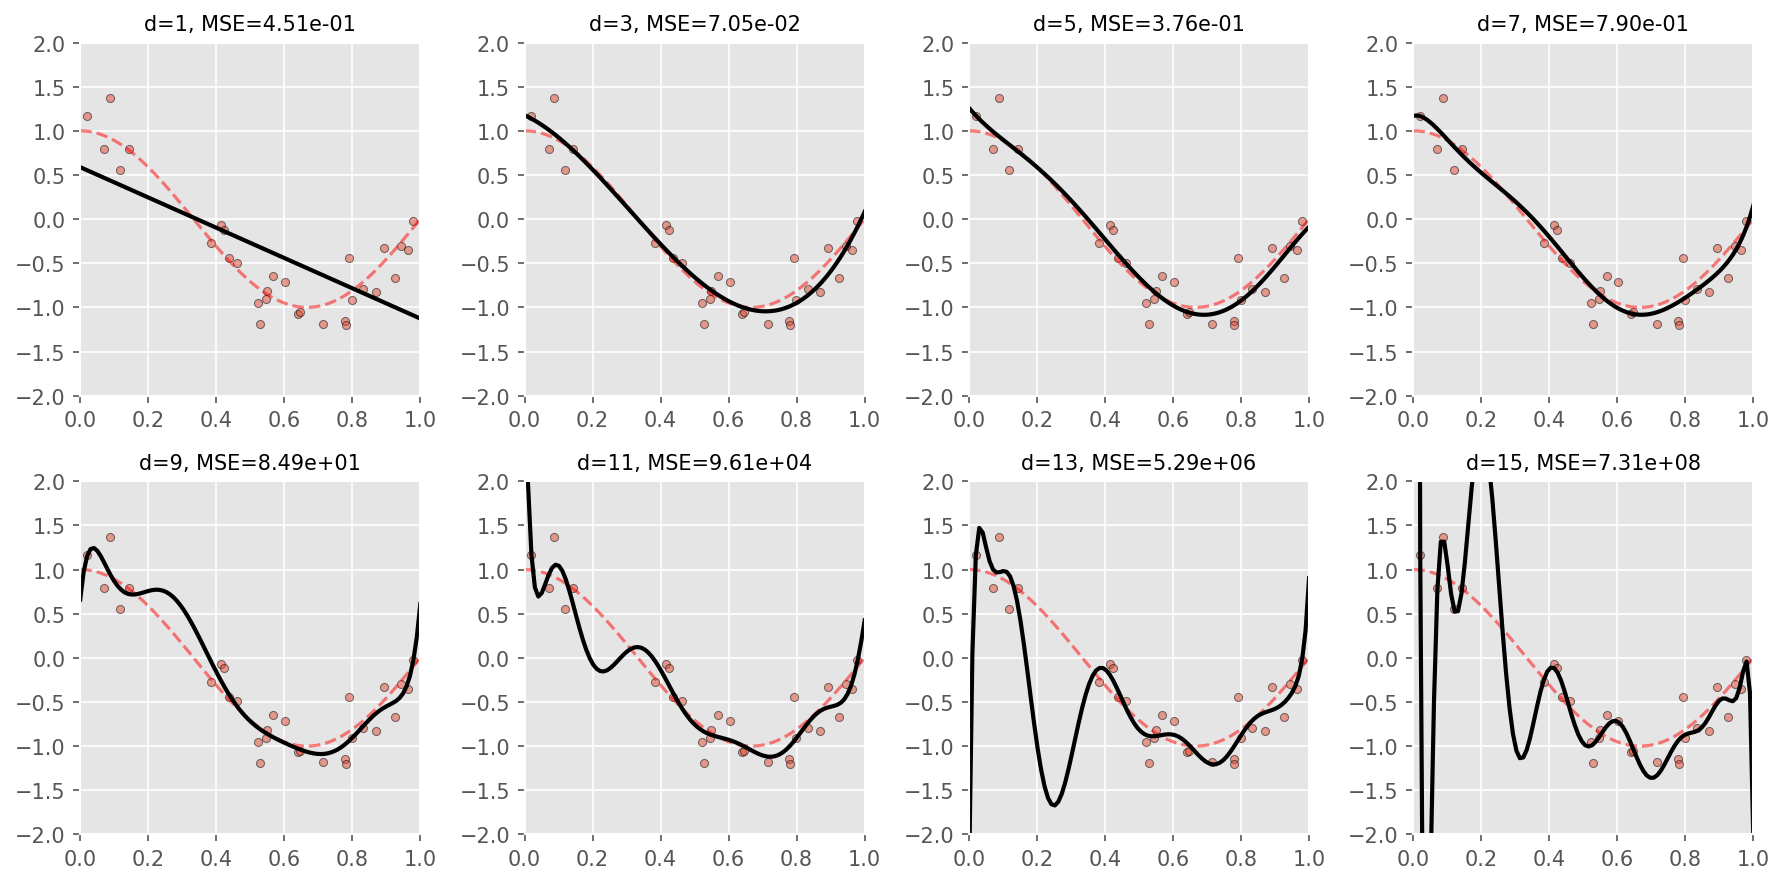

In [8]:
plt.figure()

for d in degrees:
    model = fit_poly(x, y, degree=d)
    scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)
    
    # plot data and model
    plt.subplot(2, 4, degrees.index(d) + 1)
    plt.tight_layout()
    
    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
    plt.scatter(x, y, s=15, edgecolor='k', alpha=0.5, label="Samples")
    plt.plot(x_test, model.predict(x_test[:, None]), 'k', lw=2, label="Predicted")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.title("d={}, MSE={:.2e}".format(d, -scores.mean()), fontsize=10)

plt.show()

In [9]:
def plot_coef(theta):
    plt.bar(np.arange(1, len(theta) + 1), height=np.abs(theta))
    plt.show()

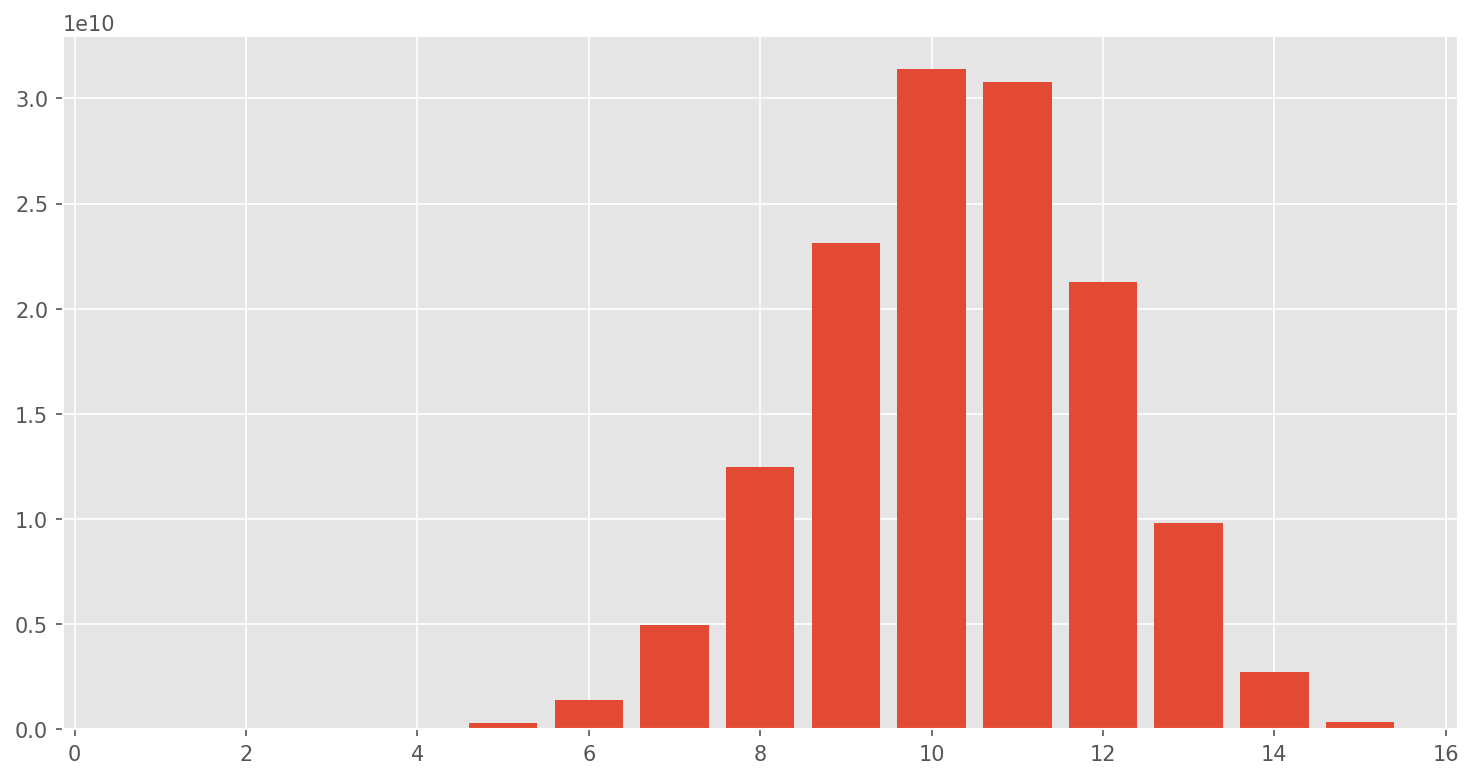

In [10]:
plot_coef(model.steps[1][1].coef_)

### L2-Regularizarion (Ridge)

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2$$

<table>
    <tr>
        <img src="imgs/L2_contour_plot.jpeg" width="40%"/>
        <img src="imgs/L2_3D.jpeg" width="40%"/>
    </tr>

</table>

In [20]:
def fit_poly_L2_reg(degree=1, lmbda=1.0):
    # add polynomial features
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    
    # create and fit the model
    linear_regression = Ridge(alpha=lmbda)
    model = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    model.fit(x[:, None], y)
    return model

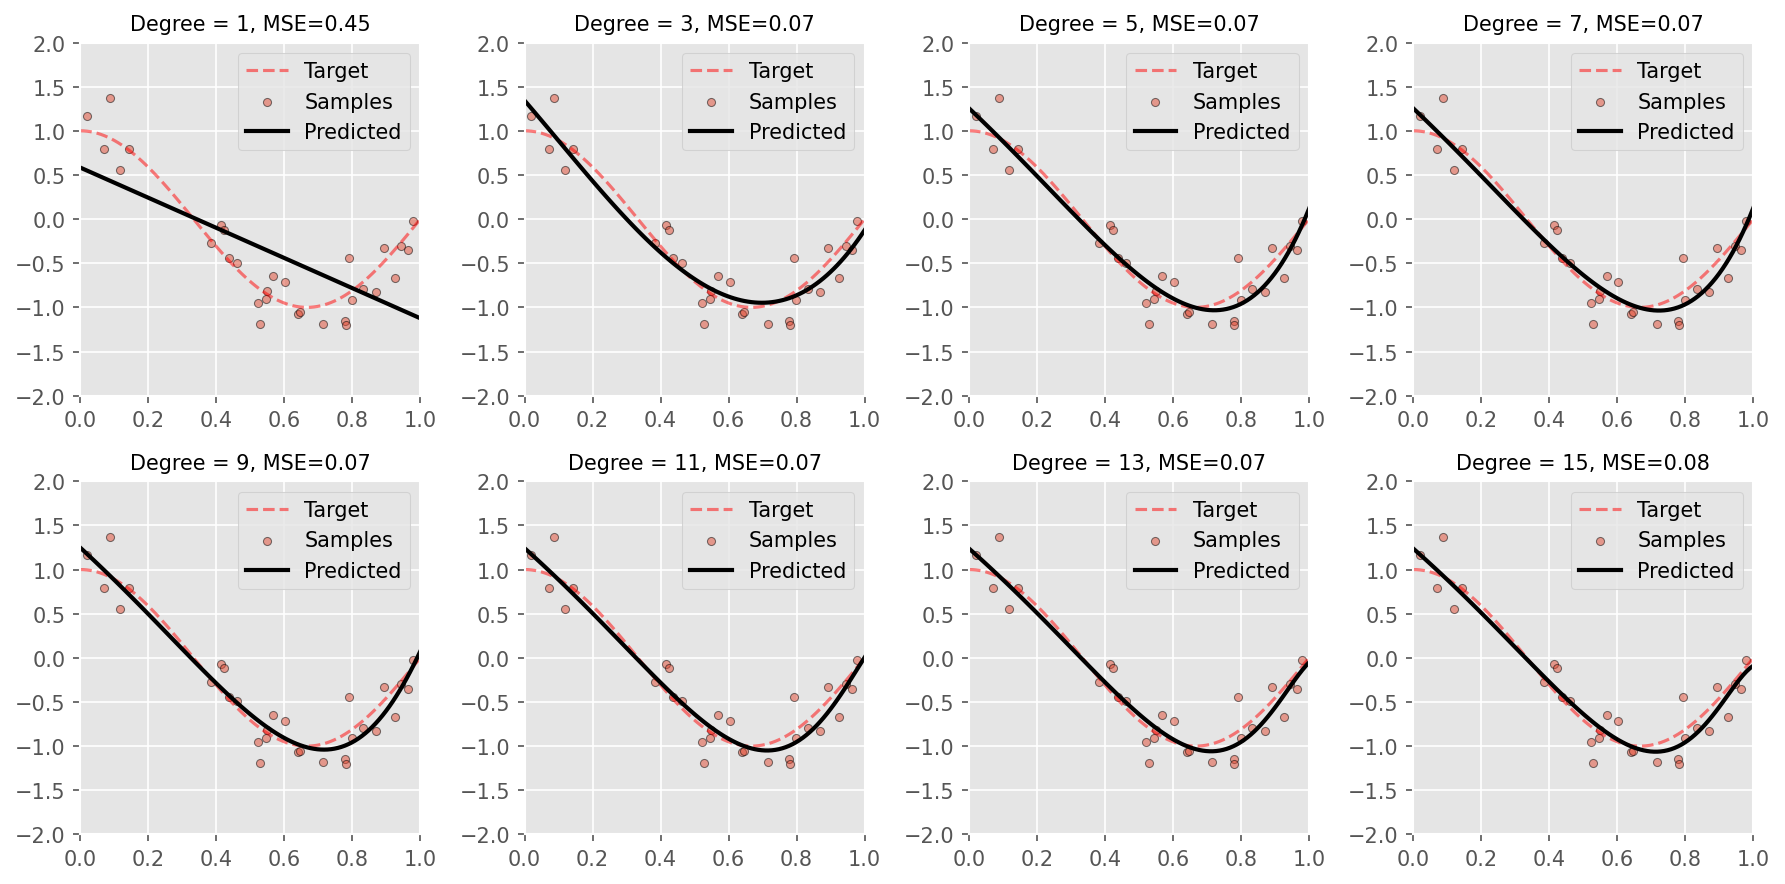

In [21]:
lmbda = 1e-2
for d in degrees:
    model = fit_poly_L2_reg(degree=d, lmbda=lmbda)
    scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)
    
    # plot data and model
    plt.subplot(2, 4, degrees.index(d) + 1)
    plt.tight_layout()
    
    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
    plt.scatter(x, y, s=15, edgecolor='k', alpha=0.5, label="Samples")
    plt.plot(x_test, model.predict(x_test[:, None]), 'k', lw=2, label="Predicted")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend()
    plt.title("Degree = {}, MSE={:.2f}".format(d, -scores.mean()), fontsize=10)

plt.show()

Visualizing effect of $\lambda$

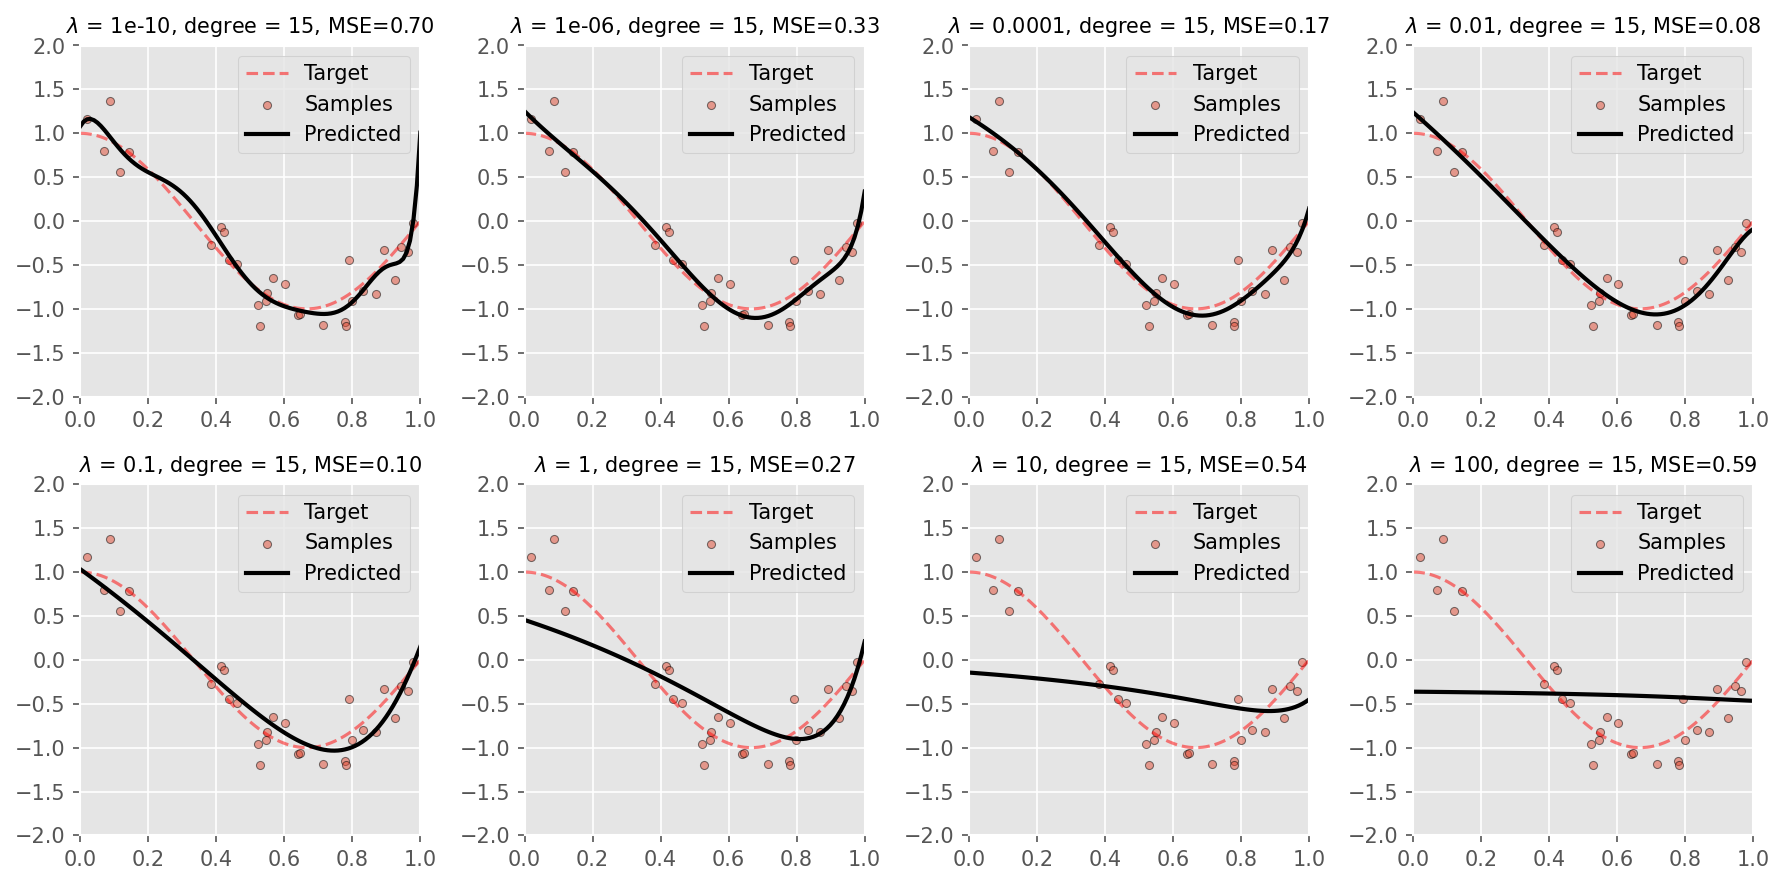

In [22]:
lmbdas = [1e-10, 1e-6, 1e-4, 1e-2, 1e-1, 1, 10, 100]

for lmbda in lmbdas:
    model = fit_poly_L2_reg(degree=15, lmbda=lmbda)
    scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)
    
    # plot data and model
    plt.subplot(2, 4, lmbdas.index(lmbda) + 1)
    plt.tight_layout()
    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
    plt.scatter(x, y, s=15, edgecolor='k', alpha=0.5, label="Samples")
    plt.plot(x_test, model.predict(x_test[:, None]), 'k', lw=2, label="Predicted")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend()
    plt.title("$\lambda$ = {}, degree = {}, MSE={:.2f}".format(lmbda, d, -scores.mean()), fontsize=10)

plt.show()

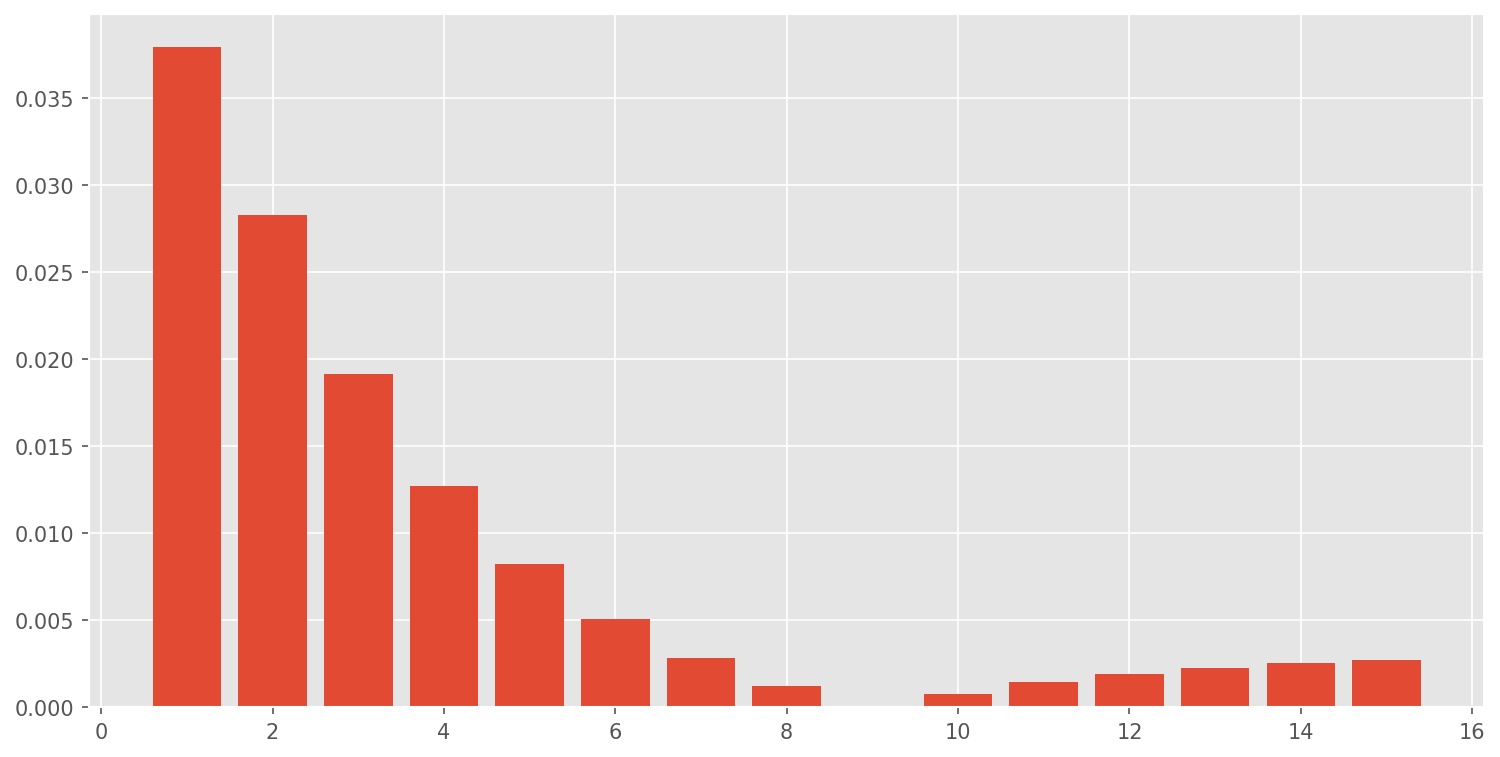

In [23]:
plot_coef(model.steps[1][1].coef_)

### L1-Regularizarion (Lasso)

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 + \frac{\lambda}{m} \sum_{j=1}^{n} |\theta_j|$$

<table>
    <tr>
        <img src="imgs/L1_contour_plot.jpeg" width="40%"/>
        <img src="imgs/L1_3D.jpeg" width="40%"/>
    </tr>

</table>

In [24]:
def fit_poly_L1_reg(degree=1, lmbda=1.0):
    
    # add polynomial features up to degree
    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    l1_regression = Lasso(alpha=lmbda)
    model = Pipeline([("poly", polynomial_features), ("l1_reg", l1_regression)])
    
    # create and fit the model
    model.fit(x[:, None], y)
    return model

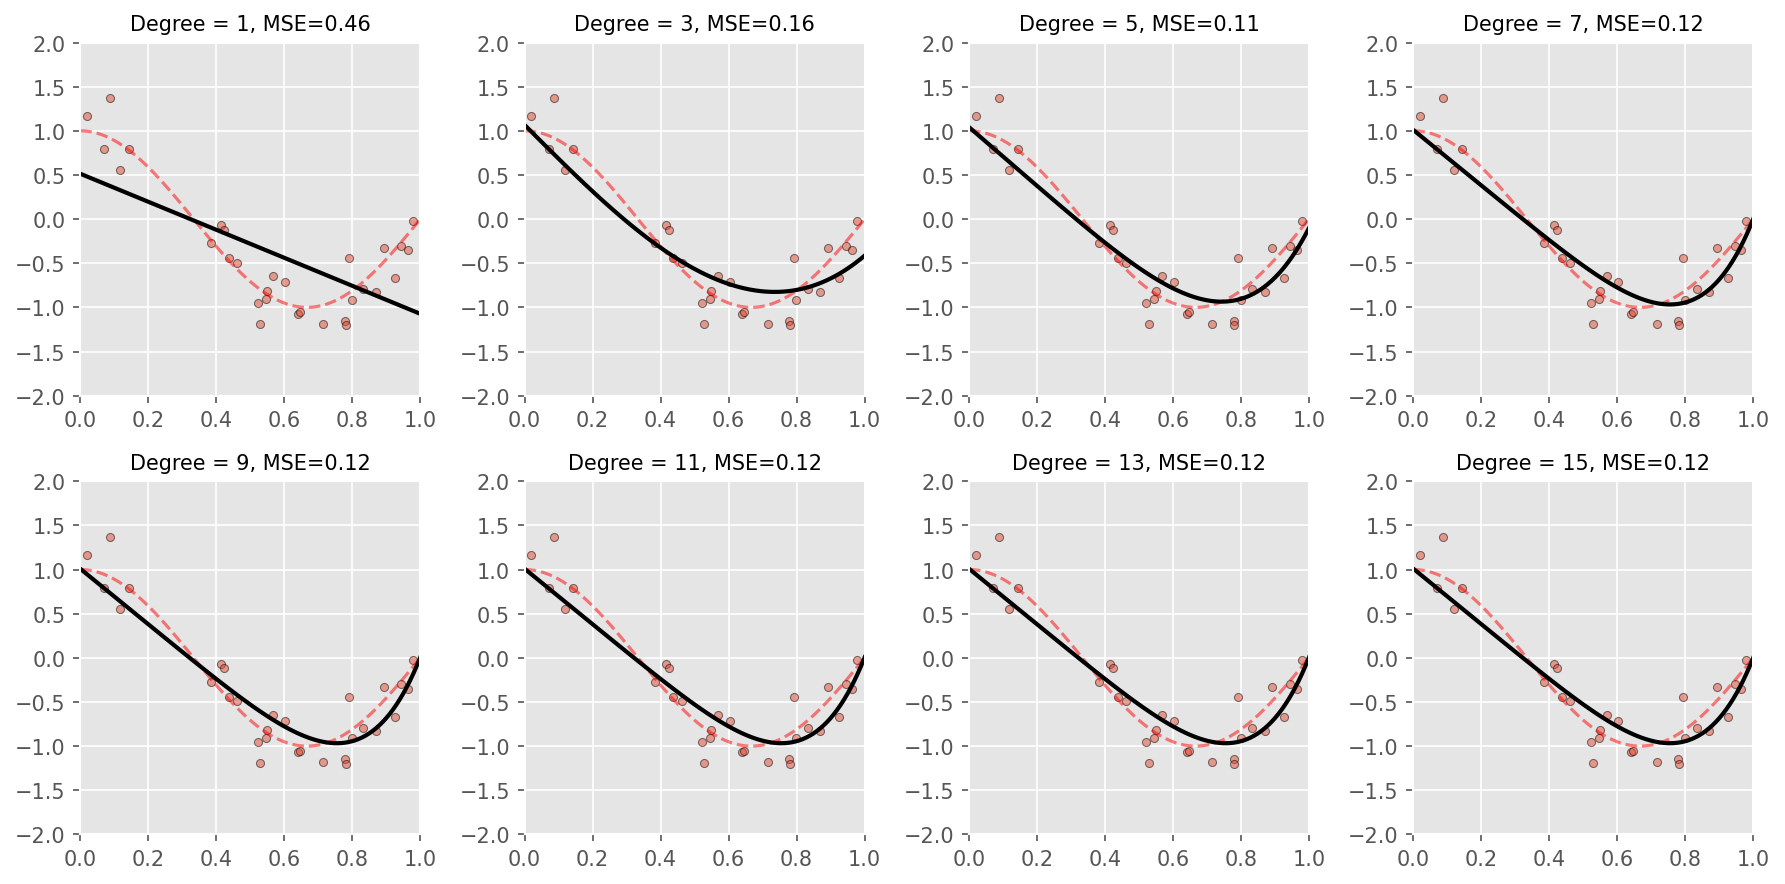

In [25]:
lmbda = 1e-2


for d in degrees:
    model = fit_poly_L1_reg(degree=d, lmbda=lmbda)
    scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)
    
    # plot data and model
    plt.subplot(2, 4, degrees.index(d) + 1)
    plt.tight_layout()
    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
    plt.scatter(x, y, s=15, edgecolor='k', alpha=0.5, label="Samples")
    plt.plot(x_test, model.predict(x_test[:, None]), 'k', lw=2, label="Predicted")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.title("Degree = {}, MSE={:.2f}".format(d, -scores.mean()), fontsize=10)
    
plt.show()

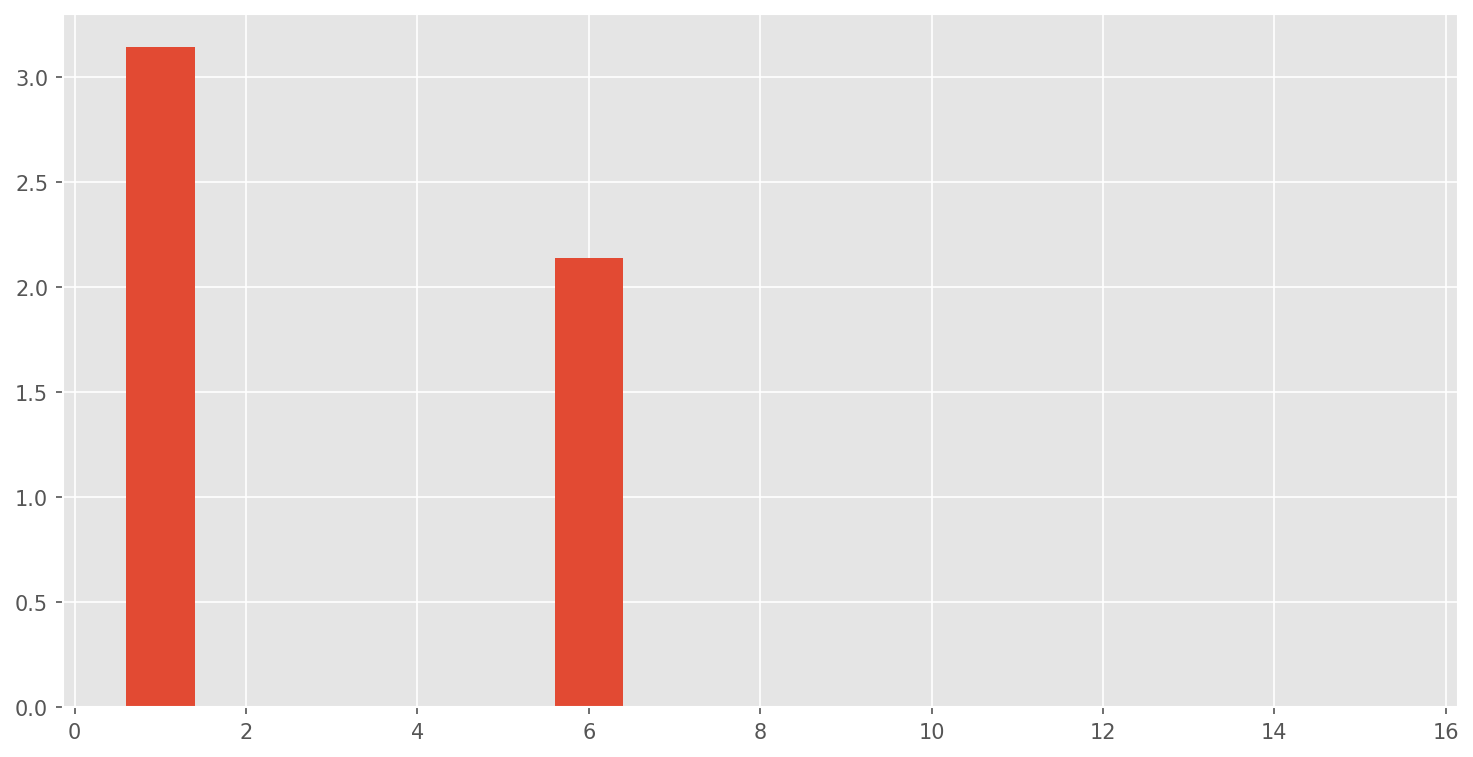

In [26]:
plot_coef(model.steps[1][1].coef_)

Visualizing effect of $\lambda$

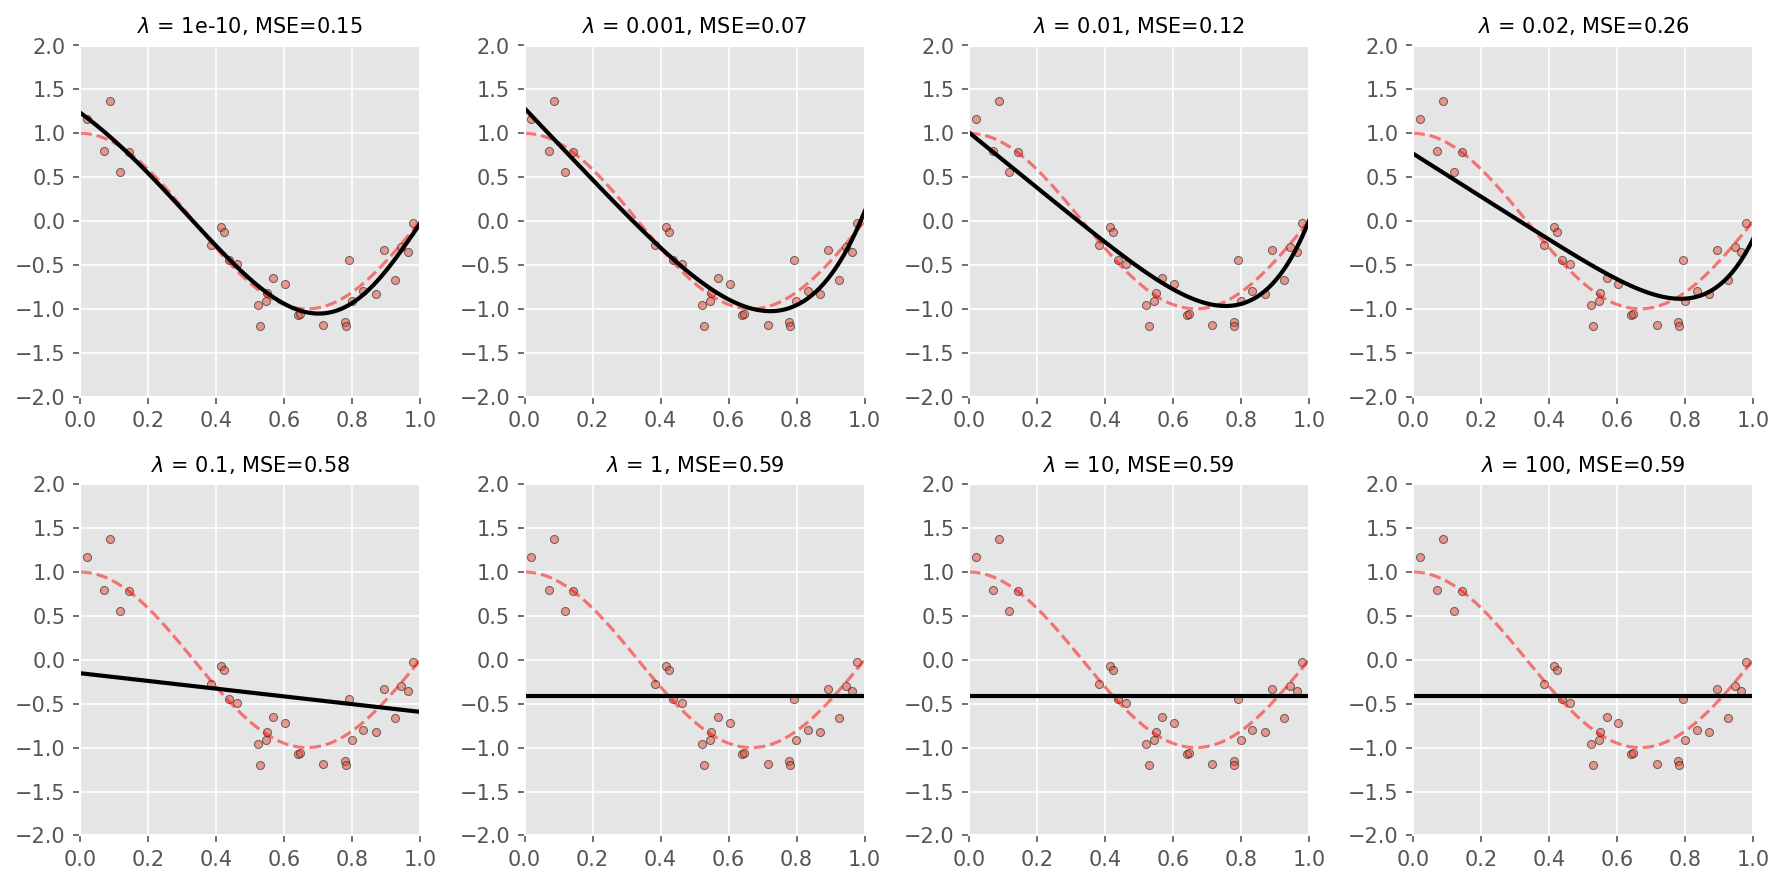

In [27]:
lmbdas = [1e-10, 1e-3, 1e-2, 2e-2, 1e-1, 1, 10, 100]


for lmbda in lmbdas:
    model = fit_poly_L1_reg(degree=15, lmbda=lmbda)
    
    # plot data and model
    scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)
    
    # plot data and model
    plt.subplot(2, 4, lmbdas.index(lmbda) + 1)
    plt.tight_layout()
    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
    plt.scatter(x, y, s=15, edgecolor='k', alpha=0.5, label="Samples")
    plt.plot(x_test, model.predict(x_test[:, None]), 'k', lw=2, label="Predicted")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.title("$\lambda$ = {}, MSE={:.2f}".format(lmbda, -scores.mean()), fontsize=10)

plt.show()

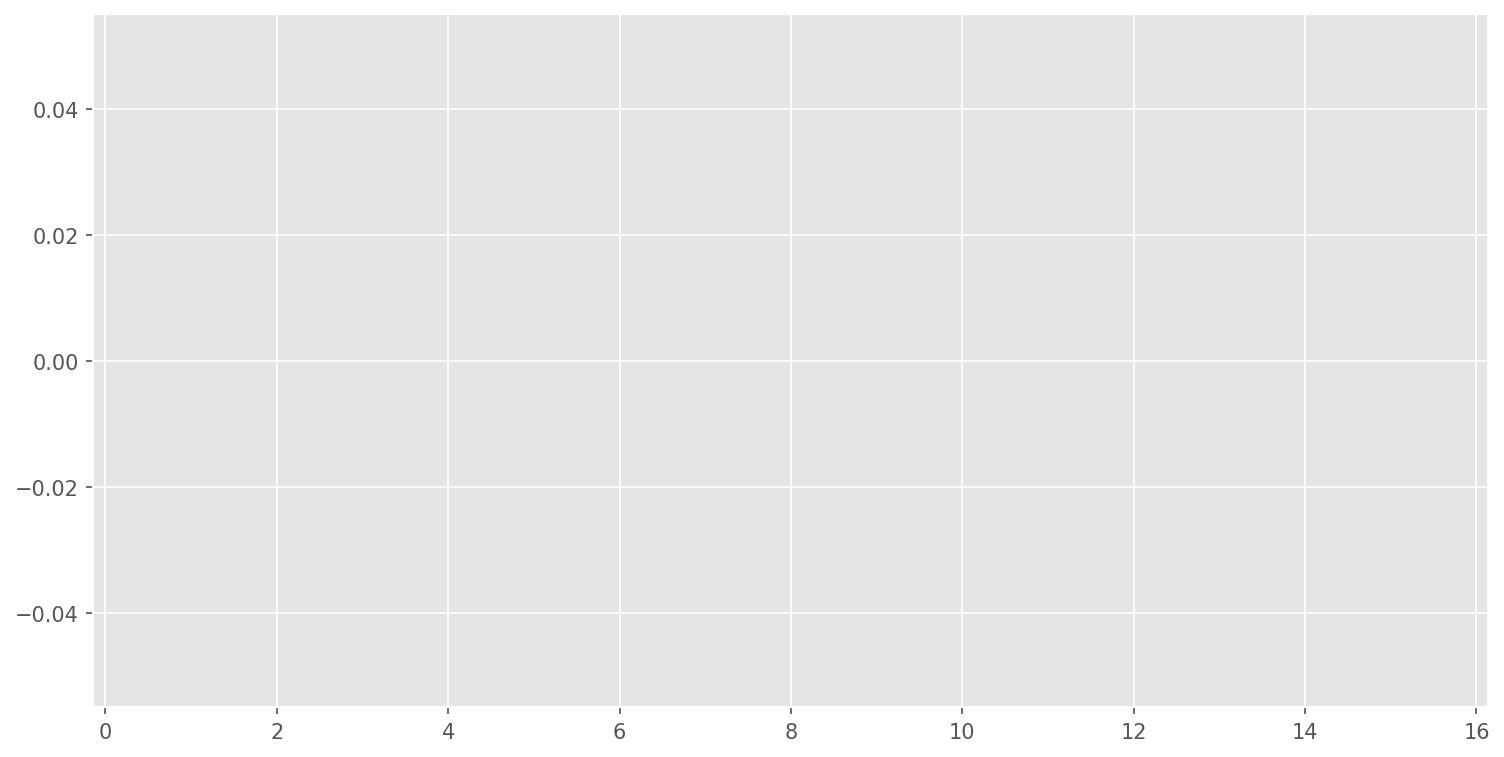

In [28]:
plot_coef(model.steps[1][1].coef_)

## Classification with Regularization

$$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log h_\theta(x^{(i)}) + (1 - y^{(i)}) \log \left(1 - h_\theta(x^{(i)})\right) \right] + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2 $$

In [29]:
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression

In [30]:
def plot_2d_separator(classifier, X, fill=False, ax=None, eps=None):
    if eps is None:
        eps = X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]

    if ax is None:
        ax = plt.gca()
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
                    levels=fill_levels, colors=['blue', 'red'], alpha=0.1)
    else:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black")
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

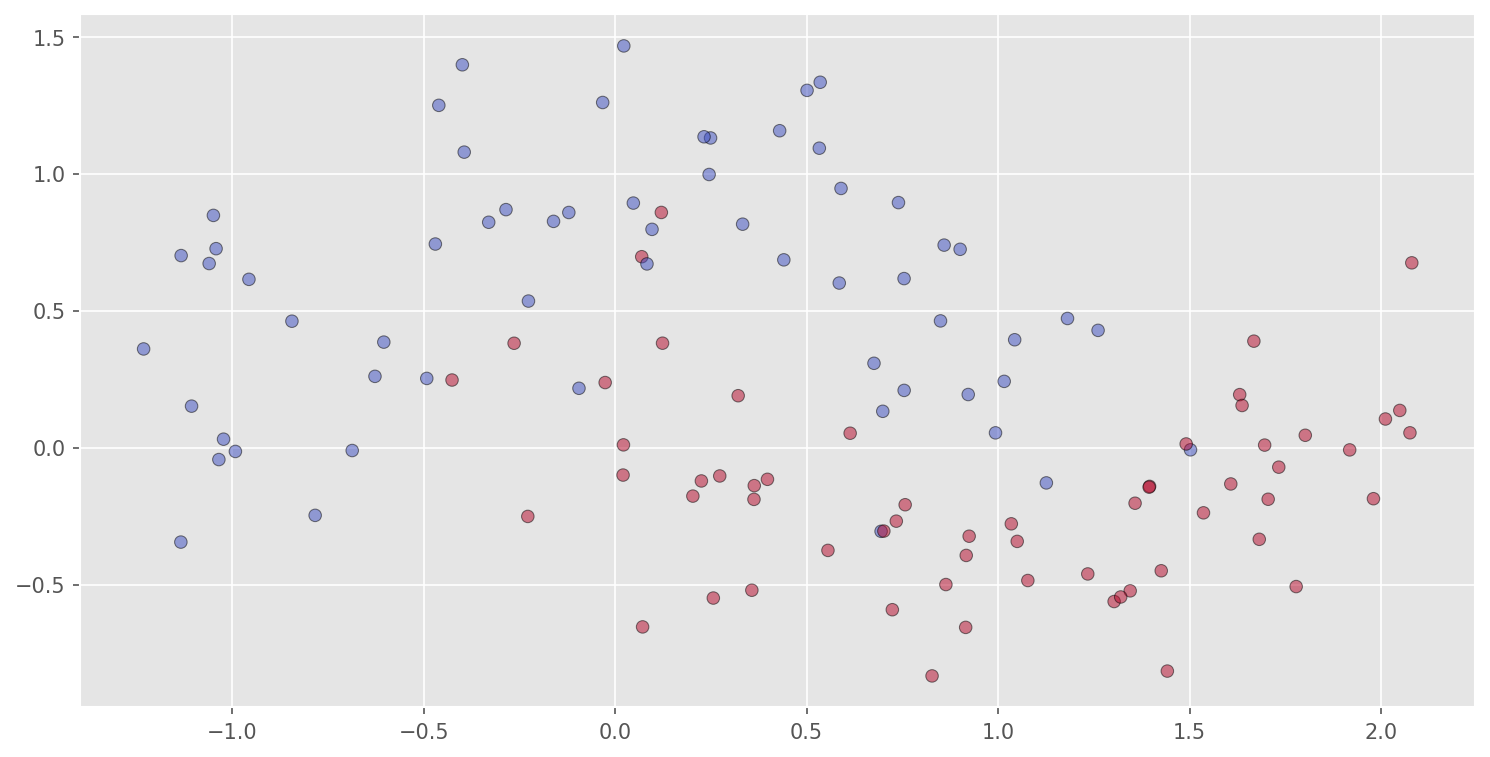

In [31]:
# create random data
X, y = make_moons(n_samples=120, noise=0.25, random_state=0)

# plot data
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, edgecolors='k', cmap=plt.cm.coolwarm)
plt.show()

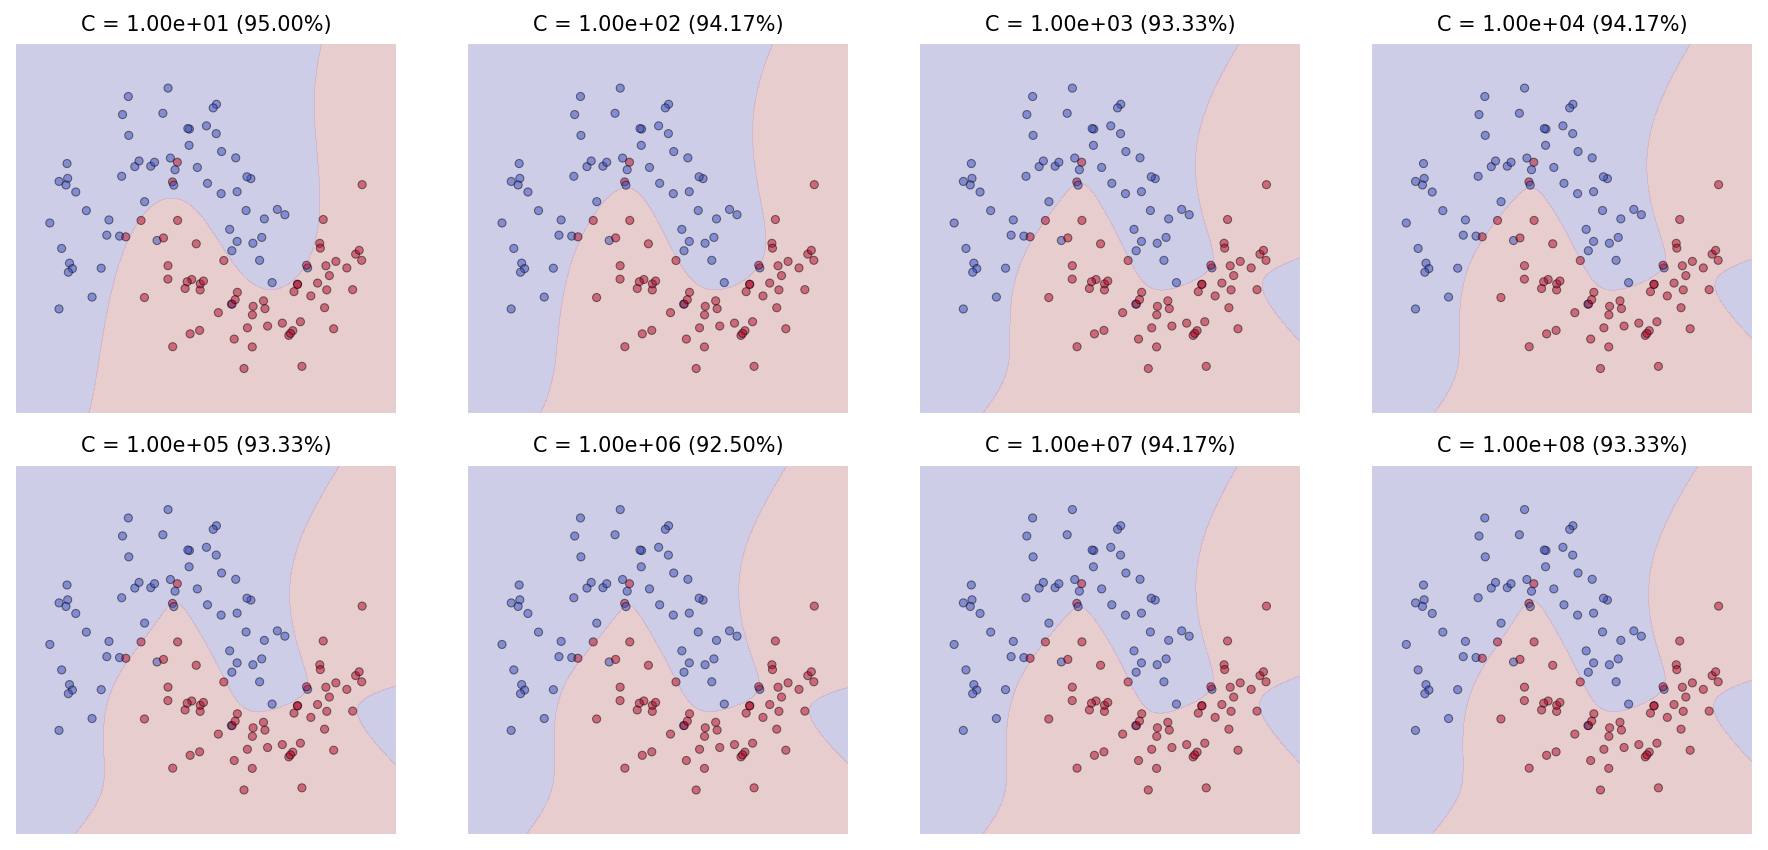

In [32]:
degree = 7
coeffs = [1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7, 1e8]

plt.figure()

for C in coeffs:
    # create logistic regression classifier
    plt.subplot(2, 4, coeffs.index(C) + 1)
    plt.tight_layout()
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)
    log_reg = LogisticRegression(C=C)
    model = Pipeline([("poly_features", poly_features), ("logistic_regression", log_reg)])
    
    # train classifier
    model.fit(X, y)
    accuracy = model.score(X, y)
    
    # plot classification results
    title = "C = {:.2e} ({:.2f}%)"
    plot_2d_separator(model, X, fill=True)
    plt.scatter(X[:, 0], X[:, 1], s=15, c=y, alpha=0.5, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title.format(C, accuracy * 100), fontsize=10)

plt.show()